# 회귀(Regression)
## "미디어 광고 예산에 의한 판매량 예측"
- 선형회귀(Multiple Linear Regression): scikit-learn

### 수행절차    
1. 문제 정의
2. 데이터 수집
3. 데이터 탐색
4. 특성 생성
5. 모델링
6. 평가

## 1. 문제 정의
"미디어 광고 예산에 의해 예측된 판매량은 얼마인가?"

## 2. 데이터 수집
- CSV 파일을 [ISL](http://www-bcf.usc.edu/~gareth/ISL)에서 다운로드

In [49]:
# Pandas를 이용하여 훈련 및 검증 데이터 로드
import pandas as pd
df_data = pd.read_csv('data/advertising.csv')

## 3. 데이터 탐색

In [50]:
# 로드된 데이터 출력
df_data.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### 3.1 데이터 정보 확인
#### 기본정보
- 200개 시장에 대한 다양한 미디어 채널에 대한 광고 예산과 판매량 정보

#### 타겟 데이터
- Sales: 판매량(단위: 1,000개) 

#### 특성 데이터
- TV: TV 광고 예산
- Radio: 라디오 광고 예산
- Newspaper: 신문 광고 예산(이상 단위: $ 1,000달러)

### 3.2 데이터 구조 확인

In [51]:
print(df_data.shape) # 데이터의 행과 열
print(df_data.info()) # 데이터의 데이터 유형

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
ID           200 non-null int64
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


### 3.3 Null 값 확인

In [52]:
df_data.isnull().sum()

ID           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

- 데이터의 Null 값은 없음

### 3.4 기술통계량 분석

In [53]:
df_data.describe()

,ID,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


- 데이터의 모든 값은 연속형임
- 데이터의 TV의 광고 예산(*TV*) 값이 상대적으로 범위가 크지만, 모두 '예산'에 관한 값이므로 표준화 하지 않음

### 3.5 데이터 시각화를 통한 분석

In [54]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns # 고급 차트 작성을 위한 라이브러리
sns.set()

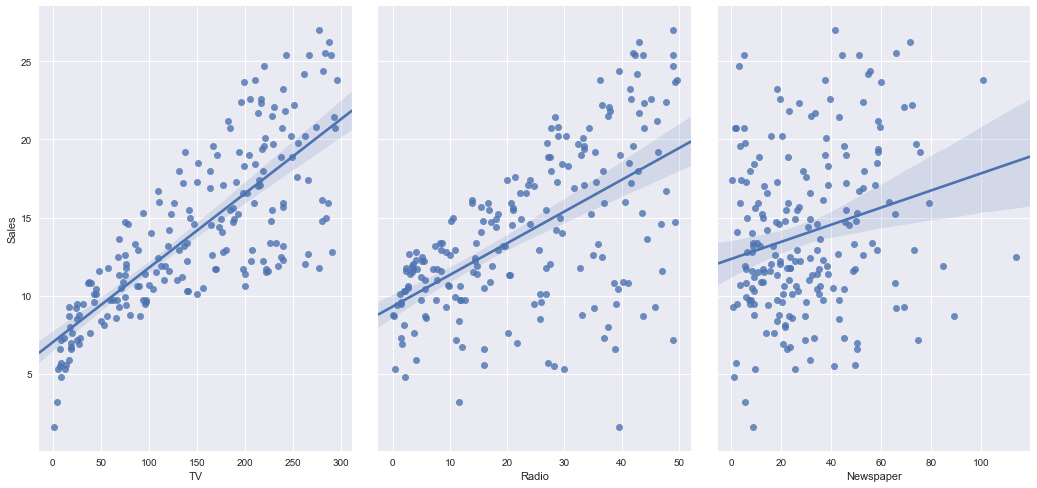

In [55]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## 4. 특성 구성

In [56]:
# 단일 파일 이므로 Skip
#df_train_test = [df_train, df_test] # 훈련 데이터와 검증 데이터 결합

### 4.1 특성 조작(Feature Engineering)

In [57]:
# 데이터 탐색 결과에 따라 별도의 특성 조작을 수행하지 않음

### 4.2 특성 및 레이블 데이터 분리

In [73]:
# 불필요 변수 제외
l_features_drop = ['Sales', 'ID']

In [74]:
# 훈련 데이터의 특성과 레이블 분리
df_train_feature = df_data.drop(l_features_drop, axis=1)
#df_train_feature = df_data.iloc[:,[3, ,4 ,5, 6, 7, 8, 9, 10, 11, 12, 13]]
df_train_label = df_data['Sales']
#df_train_label = df_data.iloc[:,[5]]

In [75]:
print(df_train_feature.shape)
print(df_train_feature.head())

(200, 3)
      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4


In [76]:
print(df_train_label.shape)
print(df_train_label.head())

(200,)
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [77]:
# 불필요 변수 제외
l_features_drop = ['Sales', 'ID']

In [78]:
# 검증 데이터의 특성과 레이블 분리
df_test_feature = df_data.drop(l_features_drop, axis=1)
#df_test_feature = df_data.iloc[:,[2, 3, 4]]
df_test_label = df_data['Sales']
#df_test_label = df_data.iloc[:,[5]]

### 4.3 훈련과 검증 데이터 분할

In [79]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_feature, df_train_label, test_size=0.3, random_state=1)
#X_train = df_train_feature
#X_test = df_test_feature
#y_train = df_train_label
# y_test = df_test_label

In [80]:
X_train.head()

,TV,Radio,Newspaper
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8


In [81]:
print(X_train.head()) # 훈련 데이터의 특성 값 확인
print(len(X_train)) # 훈련 데이터의 특성 갯수 확인
print(X_test.head()) # 검증 데이터의 특성 값 확인
print(len(X_test)) # 검증 데이터의 특성 갯수 확인
print(y_train.head()) # 훈련 데이터의 레이블 값 확인
print(len(y_train)) # 훈련 데이터의 레이블 갯수 확인
print(y_test.head()) # 검증 데이터의 레이블 값 확인
print(len(y_test)) # 검증 데이터의 레이블 갯수 확인

        TV  Radio  Newspaper
116  139.2   14.3       25.6
67   139.3   14.5       10.2
78     5.4   29.9        9.4
42   293.6   27.7        1.8
17   281.4   39.6       55.8
140
        TV  Radio  Newspaper
58   210.8   49.6       37.7
40   202.5   22.3       31.6
34    95.7    1.4        7.4
102  280.2   10.1       21.4
184  253.8   21.3       30.0
60
116    12.2
67     13.4
78      5.3
42     20.7
17     24.4
Name: Sales, dtype: float64
140
58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
Name: Sales, dtype: float64
60


## 5. 모델링

### 5.1 모델 생성 및 훈련

In [82]:
# 모델링을 위한 라이브러리
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [83]:
# 다중선형회귀(Multiple Linear Regression): scikit-learn
reg_mlr_skl = LinearRegression(
                               #fit_intercept=True
                               #normalize=False
                               #copy_X=True
                               #n_jobs=1
                               ).fit(X_train, y_train)

### 5.2 예측

In [84]:
y_pred_mlr_skl = reg_mlr_skl.predict(X_test)
y_pred_mlr_skl[0:5]

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113])

## 6. 평가

In [85]:
# 절편(Intercept) 및 회귀계수(Coefficient) 출력
print(reg_mlr_skl.intercept_)
print(reg_mlr_skl.coef_)
list(zip(X_train.columns, reg_mlr_skl.coef_))

2.9372157346906125
[0.04695205 0.17658644 0.00185115]


[('TV', 0.04695204776848464),
 ('Radio', 0.17658643526817366),
 ('Newspaper', 0.001851153318892224)]

In [86]:
# 결정계수(R-squared) 출력
print('R-squaured:', reg_mlr_skl.score(X_train, y_train))

R-squaured: 0.8850053786777521


In [87]:
# 평균절대오차(MAE), 평균제곱오차(MSE), 평균제곱근오차(RMSE) 출력
print('Mean Absolute Error: %.2f' % metrics.mean_absolute_error(y_test, y_pred_mlr_skl))
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(y_test, y_pred_mlr_skl))
print('Root Mean Squared Error: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr_skl)))

Mean Absolute Error: 1.05
Mean Squared Error: 1.93
Root Mean Squared Error: 1.39
